In [1]:
#必要なライブラリをインポートする
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
#とりあえず書いておいてください
%matplotlib inline

In [3]:
#csvデータを下記のリンクからダウンロードし、パスを与える
#https://stopcovid19.metro.tokyo.lg.jp/data/130001_tokyo_covid19_patients.csv
#東京都公式のデータなのでご安心を
#df_patientの処理では公表年月日のところをdatetime型にしている

df_patient = pd.read_csv('https://stopcovid19.metro.tokyo.lg.jp/data/130001_tokyo_covid19_patients.csv')
df_patient['公表_年月日'] = pd.to_datetime(df_patient['公表_年月日'])
df_patient

,No,全国地方公共団体コード,都道府県名,市区町村名,公表_年月日,曜日,発症_年月日,患者_居住地,患者_年代,患者_性別,患者_属性,患者_状態,患者_症状,患者_渡航歴の有無フラグ,備考,退院済フラグ
0,1,130001,東京都,NaN,2020-01-24,金,NaN,湖北省武漢市,40代,男性,NaN,NaN,NaN,NaN,NaN,1.0
1,2,130001,東京都,NaN,2020-01-25,土,NaN,湖北省武漢市,30代,女性,NaN,NaN,NaN,NaN,NaN,1.0
2,3,130001,東京都,NaN,2020-01-30,木,NaN,湖南省長沙市,30代,女性,NaN,NaN,NaN,NaN,NaN,1.0
3,4,130001,東京都,NaN,2020-02-13,木,NaN,都内,70代,男性,NaN,NaN,NaN,NaN,NaN,1.0
4,5,130001,東京都,NaN,2020-02-14,金,NaN,都内,50代,女性,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14017,13881,130001,東京都,NaN,2020-08-04,火,NaN,NaN,80代,男性,NaN,NaN,NaN,NaN,NaN,NaN
14018,13742,130001,東京都,NaN,2020-08-04,火,NaN,NaN,90代,女性,NaN,NaN,NaN,NaN,NaN,NaN
14019,13879,130001,東京都,NaN,2020-08-04,火,NaN,NaN,90代,女性,NaN,NaN,NaN,NaN,NaN,NaN
14020,13882,130001,東京都,NaN,2020-08-04,火,NaN,NaN,90代,女性,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#必要なデータだけに絞っている

df_patient_day = df_patient.groupby(['公表_年月日', '患者_年代']).count().reset_index()[['公表_年月日','患者_年代','No']]
df_patient_day

,公表_年月日,患者_年代,No
0,2020-01-24,40代,1
1,2020-01-25,30代,1
2,2020-01-30,30代,1
3,2020-02-13,70代,1
4,2020-02-14,50代,1
...,...,...,...
1158,2020-08-04,50代,25
1159,2020-08-04,60代,14
1160,2020-08-04,70代,12
1161,2020-08-04,80代,7


In [5]:
#数字のデータに変換している

patient_dic = {'10歳未満':'under 10',\
              '10代':'10',\
              '20代':'20',\
              '30代':'30',\
              '40代':'40',\
              '50代':'50',\
              '60代':'60',\
              '70代':'70',\
              '80代':'80',\
              '90代':'90',\
              '100歳以上':'over 100',\
               "'-": '-',
               '不明': 'unknown'
              }

In [6]:
#変換している

df_patient_day['患者_年代'] = [patient_dic[x] for x in df_patient_day['患者_年代'].values.tolist()]
df_patient_day

,公表_年月日,患者_年代,No
0,2020-01-24,40,1
1,2020-01-25,30,1
2,2020-01-30,30,1
3,2020-02-13,70,1
4,2020-02-14,50,1
...,...,...,...
1158,2020-08-04,50,25
1159,2020-08-04,60,14
1160,2020-08-04,70,12
1161,2020-08-04,80,7


In [7]:
#p_listを設定

p_list = ['under 10',\
         '10',\
         '20',\
         '30',\
         '40',\
         '50',\
         '60',\
         '70',\
         '80',\
         '90',\
         'over 100',\
         '-',\
         'unknown',\
         ]

In [8]:
#daysとdataをそれぞれ設定

days = pd.date_range(start=df_patient['公表_年月日'].min(), end=df_patient['公表_年月日'].max(), freq='D')
data = [[x, y] for x in days for y in p_list]

In [9]:
#わかりやすくしている

df_data = pd.DataFrame(data, columns=['公表_年月日', '患者_年代'])
df_data = pd.merge(df_data, df_patient_day, on=['公表_年月日', '患者_年代'], how='left').fillna(0)
df_data = df_data.rename(columns={'No':'人数'})
df_data

,公表_年月日,患者_年代,人数
0,2020-01-24,under 10,0.0
1,2020-01-24,10,0.0
2,2020-01-24,20,0.0
3,2020-01-24,30,0.0
4,2020-01-24,40,1.0
...,...,...,...
2517,2020-08-04,80,7.0
2518,2020-08-04,90,4.0
2519,2020-08-04,over 100,0.0
2520,2020-08-04,-,0.0


In [10]:
#出力

result_diff = {}
for x in p_list:
    df = df_data[df_data['患者_年代'] == x]
    df = pd.Series(df['人数'].values.tolist(), index=df['公表_年月日'].values)
    result_diff[x] = df.rolling(7).mean().dropna()
df

2020-01-24    0.0
2020-01-25    0.0
2020-01-26    0.0
2020-01-27    0.0
2020-01-28    0.0
             ... 
2020-07-31    0.0
2020-08-01    0.0
2020-08-02    0.0
2020-08-03    0.0
2020-08-04    0.0
Length: 194, dtype: float64

(0.0, 200.0)

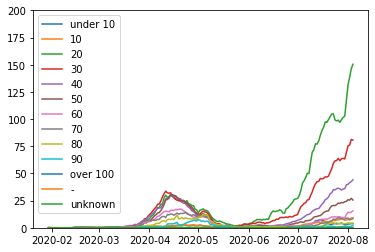

In [13]:
#作成したデータを描画している

fig, axe = plt.subplots()
for x in p_list:
    df_diff = result_diff[x]
    axe.plot(df_diff.index, df_diff.values, label=x)

#見にくいのでset_ylimの値は自由に変更してもいい
    
axe.legend()
axe.set_ylim([0, 200])